In [1]:
import scanpy as sc

[Executed on 2023-12-12 23:40:47.732991]


/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


### row data of mouse ###

In [2]:
adata=sc.read_h5ad('/proj/sensoryaging/60_plates_data/Human_data/ref/HC_adata_raw_new.h5ad')

[Executed on 2023-12-12 23:42:13.800391]


In [4]:
adata

[Executed on 2023-12-12 23:43:08.788728]


AnnData object with n_obs × n_vars = 163 × 18257
    obs: 'CellID', 'TotalCounts', 'DetGenesAbove1CountFromTotalCounts', 'HHAnn', 'Batch', '_scvi_batch', '_scvi_labels', 'leiden', 'MetaType', 'leiden_subcluster'
    uns: 'Batch_colors', 'HHAnn_colors', 'MetaType_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_leiden_subcluster', 'leiden', 'leiden_colors', 'leiden_subcluster_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
#rank gene group
import pandas as pd
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

[Executed on 2023-12-12 23:44:16.214491]


0        1     2,0    2,1              3        4
0     Synpr   Loxhd1  Osbpl6   Dlk2            Gsn     Fgf7
1    Rasal2   Kcnj16    Pcp4  Rasd2          Rspo3  S100a13
2     Calm1     Gbx2   Scn3b  Tjap1         Acot11   S100a1
3    Scpep1  Gm14461  Atp2b1  Psat1         Sema6d     Tbx1
4     Plcd3  Col27a1    Pole    Ptn         Ccdc33     Spp1
5  Cacna2d4     Cib2  Thsd7b  Chst5      Hist3h2ba      Clu
6    Atp8a1    Cd24a   Pxdc1  Mgst3         Anks1b      Lbh
7       Ckb    Tshz3    Otof  Mob3b           Cib3     Whrn
8      Dnm1      Gls  Osbpl9   Fmn1          Neat1   Erich5
9    Gm1322      Fry   Lce6a  Ush2a  E030019B06Rik   Trip12

In [33]:
adata.obs['leiden'].value_counts()

[Executed on 2023-12-12 10:14:21.813936]


leiden
0    37
1    33
2    32
3    25
4    20
5    16
Name: count, dtype: int64

In [37]:
#name cluster 2 as type 2 hair cells
adata.obs['leiden']=adata.obs['leiden'].replace('2','type2 hair cells')
adata.obs['leiden']=adata.obs['leiden'].replace('1','type1 hair cells_1')
adata.obs['leiden']=adata.obs['leiden'].replace('0','type1 hair cells_2')
adata.obs['leiden']=adata.obs['leiden'].replace('3','type1 hair cells_3')
adata.obs['leiden']=adata.obs['leiden'].replace('4','type1 hair cells_4')

[Executed on 2023-12-12 10:15:57.872309]


In [5]:
adata.var

[Executed on 2023-12-11 12:07:51.197236]


Empty DataFrame
Columns: []
Index: [Adora1, Sntg1, Prim2, Bai3, Cflar, Obsl1, Syt14, Pld5, Lmx1a, Lactb2, Cpa6, A830018L16Rik, Efhc1, Khdrbs2, Lonrf2, Actr1b, Dnah7b, Gpr45, Dnah7a, Pgap1, Plcl1, Bmpr2, Pard3b, Spag16, Usp37, Xrcc5, Erbb4, Abca12, Pinc, D530049I02Rik, Dock10, Sh3bp4, Dis3l2, Slc16a14, Pask, Cdh20, Serpinb12, Cdh7, Cntnap5a, Clasp1, Dpp10, Cdk18, Thsd7b, Rab3gap1, Mapkapk2, Rnpep, Camsap2, Aspm, Kcnt2, Pla2g4a, Brinp3, Cdc73, Brinp2, Nmnat2, Stx6, Rasal2, Rcsd1, Rabgap1l, Rgs7, Trp53bp2, Itpkb, Akt3, Smyd3, Cnih3, Ptpn14, Rps6kc1, Tgfb2, Esrrg, Ush2a, A330023F24Rik, Xkr4, Rp1, Rgs20, Atp6v1h, St18, Mybl1, Adhfe1, Sgk3, Tcf24, Arfgef1, Cspp1, Prex2, Sulf1, Ncoa2, Slco5a1, Eya1, Kcnb2, Stau2, Rdh10, Tceb1, Sbspon, Jph1, Tfap2d, Pkhd1, Kcnq5, Rims1, Smap1, Col9a1, Col19a1, Dst, ...]

[18257 rows x 0 columns]

### human 

In [6]:
human=sc.read_h5ad("/proj/sensoryaging/60_plates_data/Human_data/data_process/First_UMAP.h5ad")

[Executed on 2023-12-12 23:44:36.905274]


[Executed on 2023-12-12 23:46:34.527566]


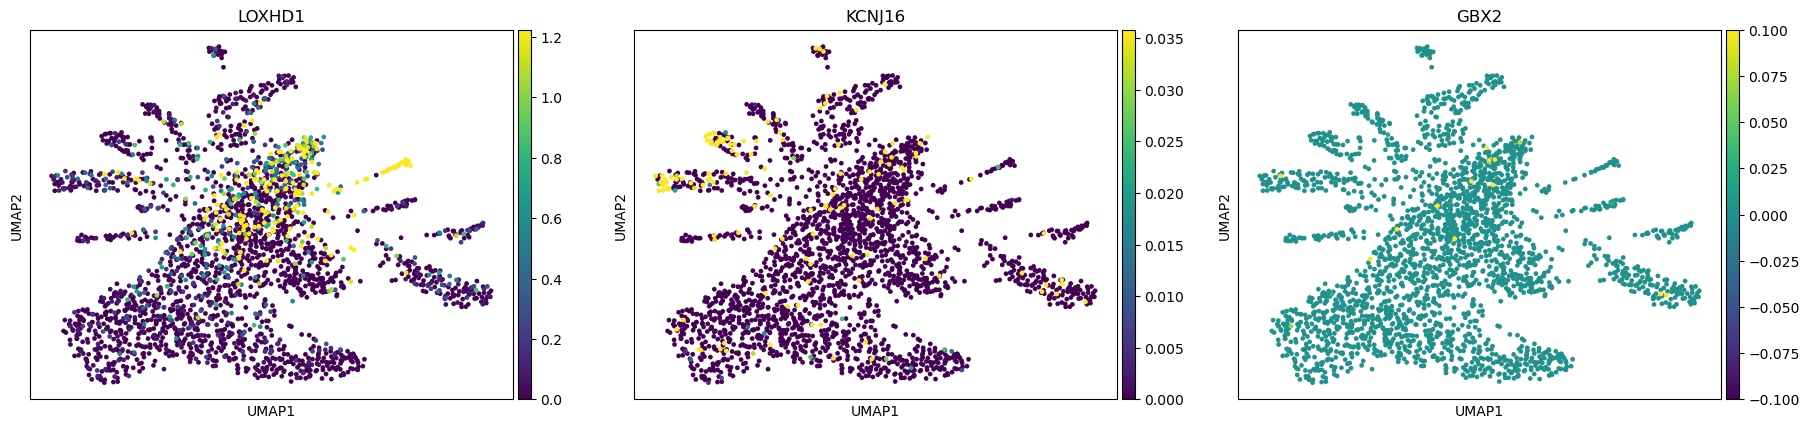

In [9]:
sc.pl.umap(human,color=['LOXHD1','KCNJ16','GBX2'],layer='log1p',vmax='p95')

[Executed on 2023-12-12 23:46:38.004614]


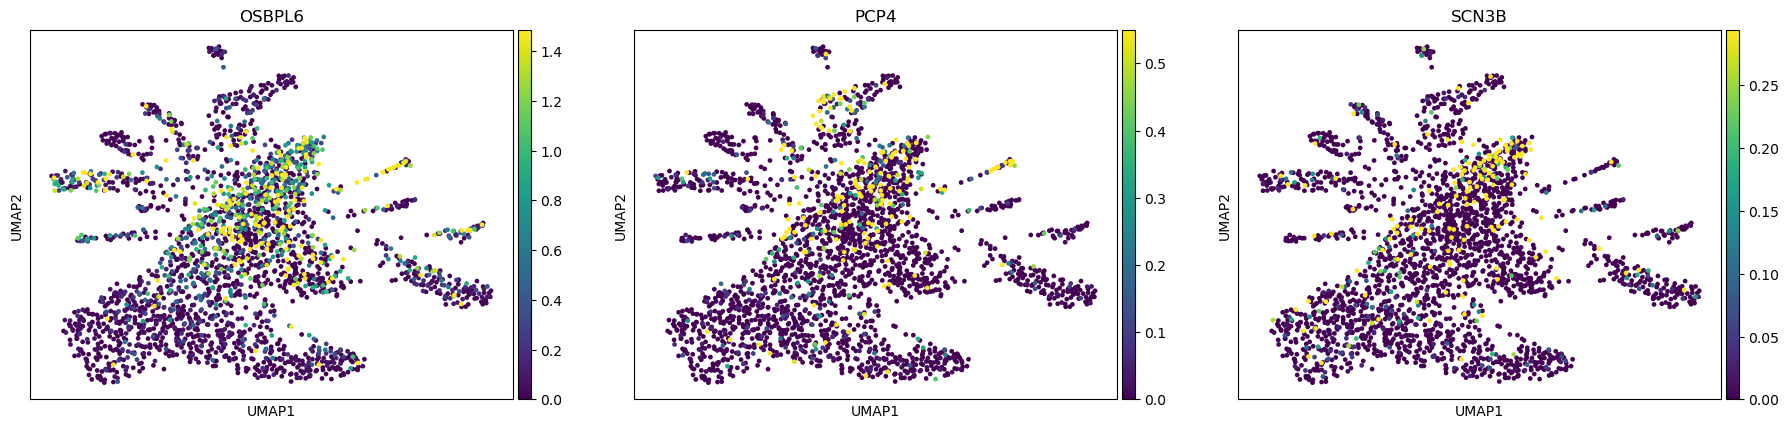

In [10]:
sc.pl.umap(human,color=['OSBPL6','PCP4','SCN3B'],layer='log1p',vmax='p95')

[Executed on 2023-12-12 23:47:05.684472]


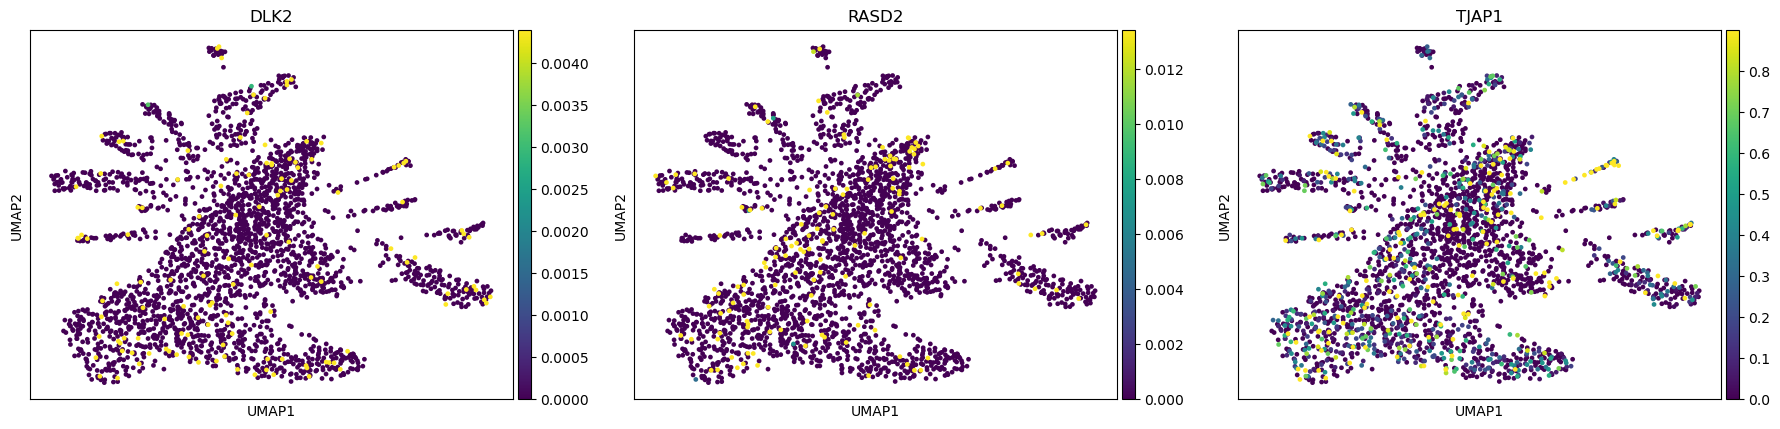

In [11]:
sc.pl.umap(human,color=['DLK2','RASD2','TJAP1'],layer='log1p',vmax='p95')

[Executed on 2023-12-12 23:47:39.722647]


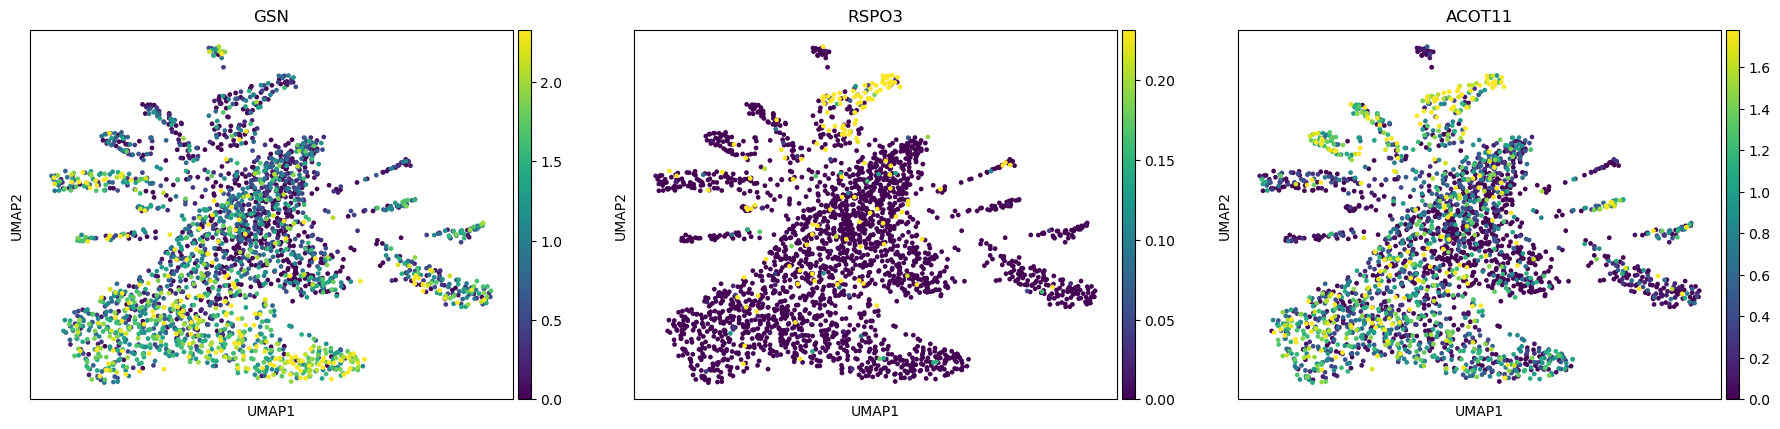

In [12]:
sc.pl.umap(human,color=['GSN','RSPO3','ACOT11'],layer='log1p',vmax='p95')

[Executed on 2023-12-12 23:47:54.803524]


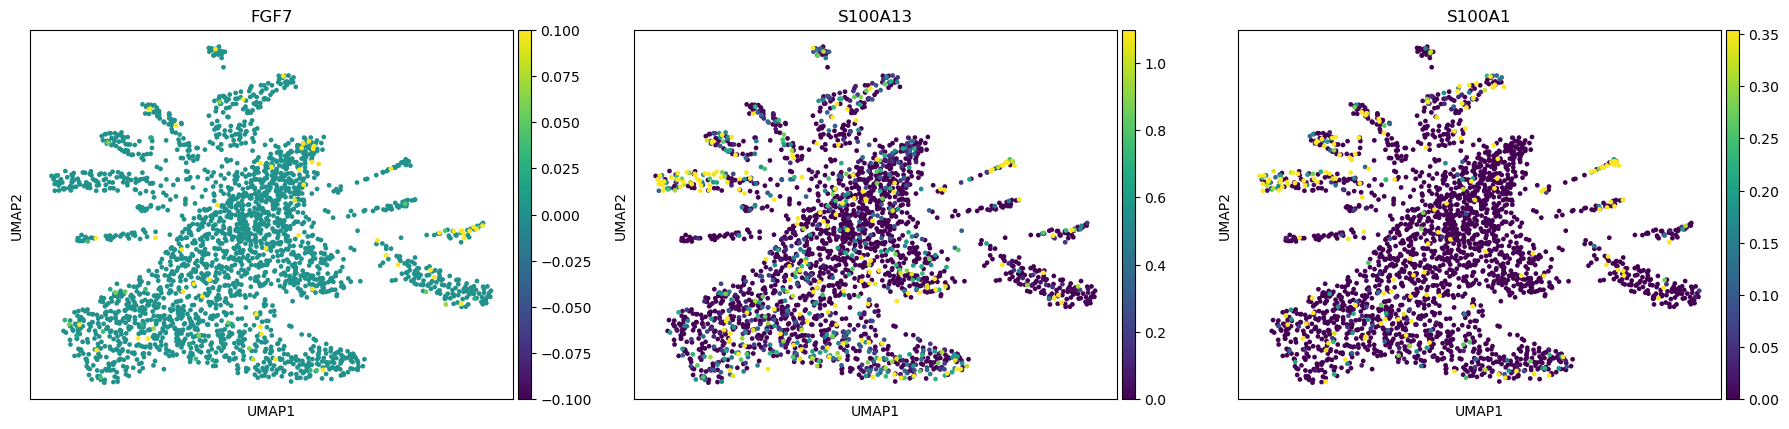

In [13]:
sc.pl.umap(human,color=['FGF7','S100A13','S100A1'],layer='log1p',vmax='p95')

[Executed on 2023-12-12 09:53:13.957552]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


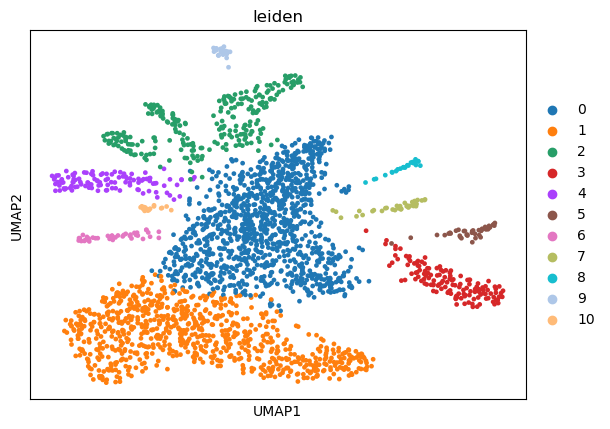

In [6]:
sc.pl.umap(human,color=['leiden'])

[Executed on 2023-12-12 09:55:03.050888]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


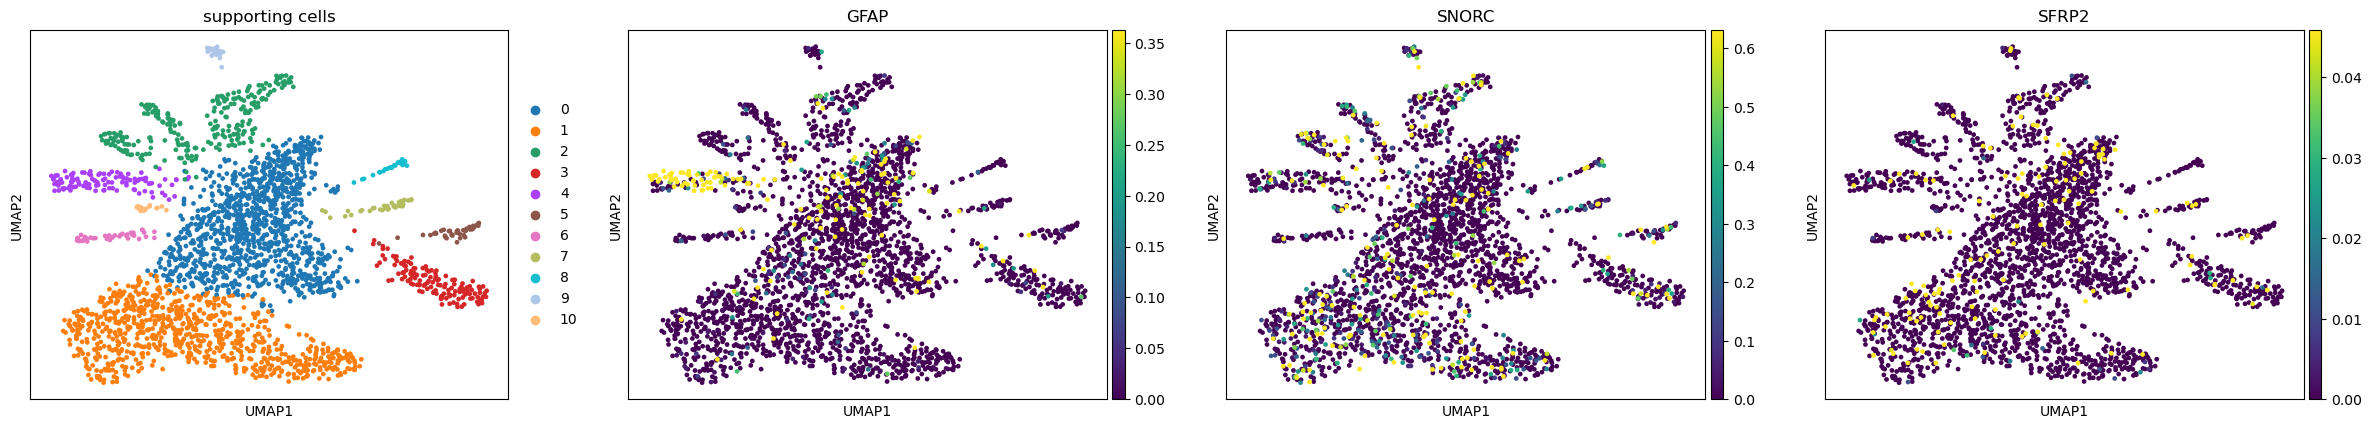

In [13]:
sc.pl.umap(human,color=['leiden','GFAP', 'SNORC', 'SFRP2'],layer='log1p',vmax='p95',title='supporting cells')

[Executed on 2023-12-12 10:20:27.798482]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


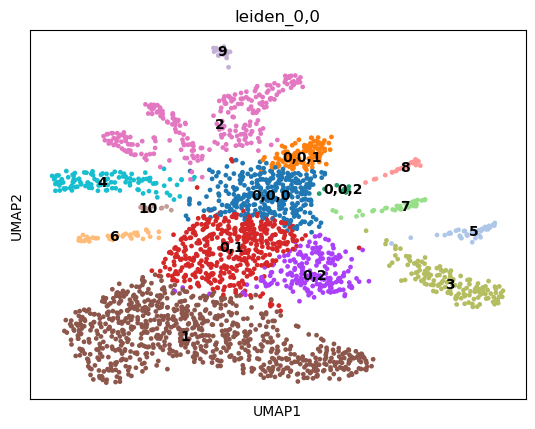

In [44]:
sc.tl.leiden(human,resolution=0.3,restrict_to=('leiden_0',['0,0']) ,key_added='leiden_0,0')

sc.pl.umap(human,color=['leiden_0,0'],legend_loc='on data')


[Executed on 2023-12-12 10:20:32.305467]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


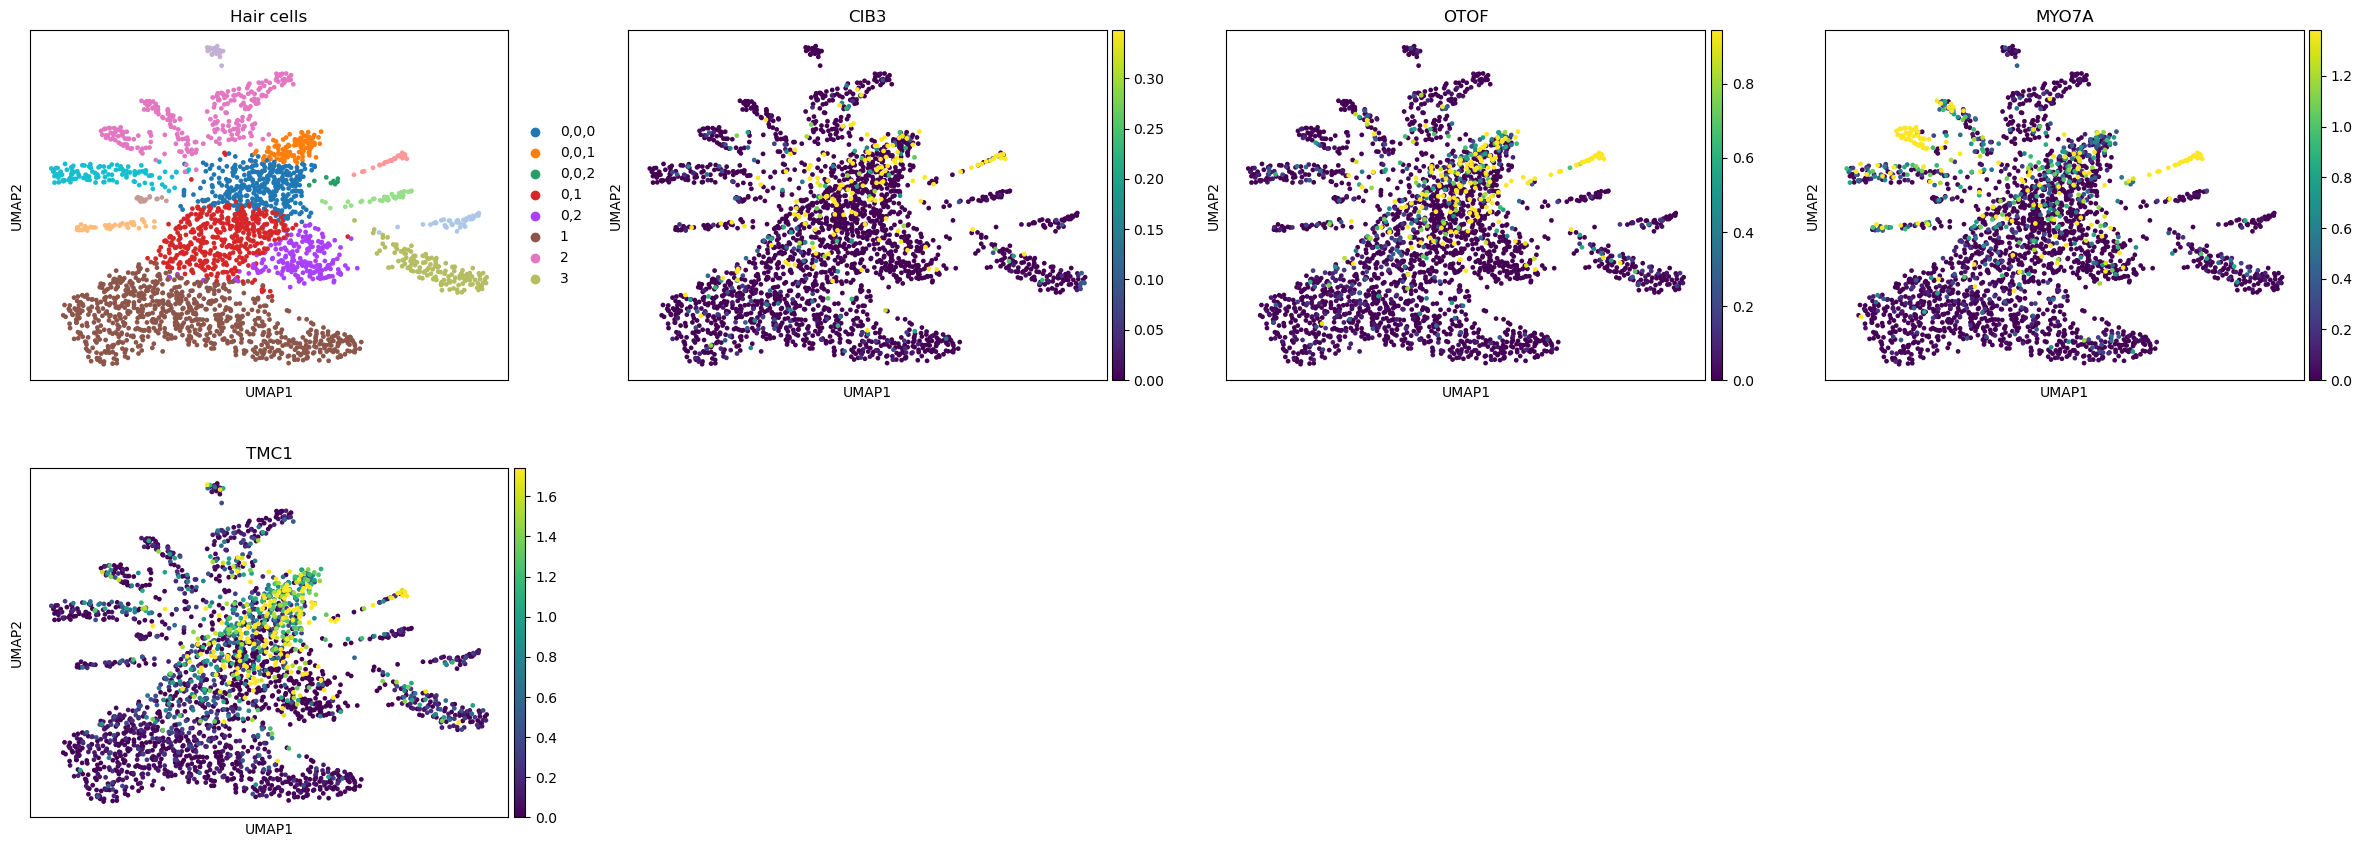

In [45]:
sc.pl.umap(human,color=['leiden_0,0','CIB3', 'OTOF', 'MYO7A', 'TMC1'],layer='log1p',vmax='p95',title='Hair cells')

In [ ]:
$

[Executed on 2023-12-12 10:00:42.297253]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


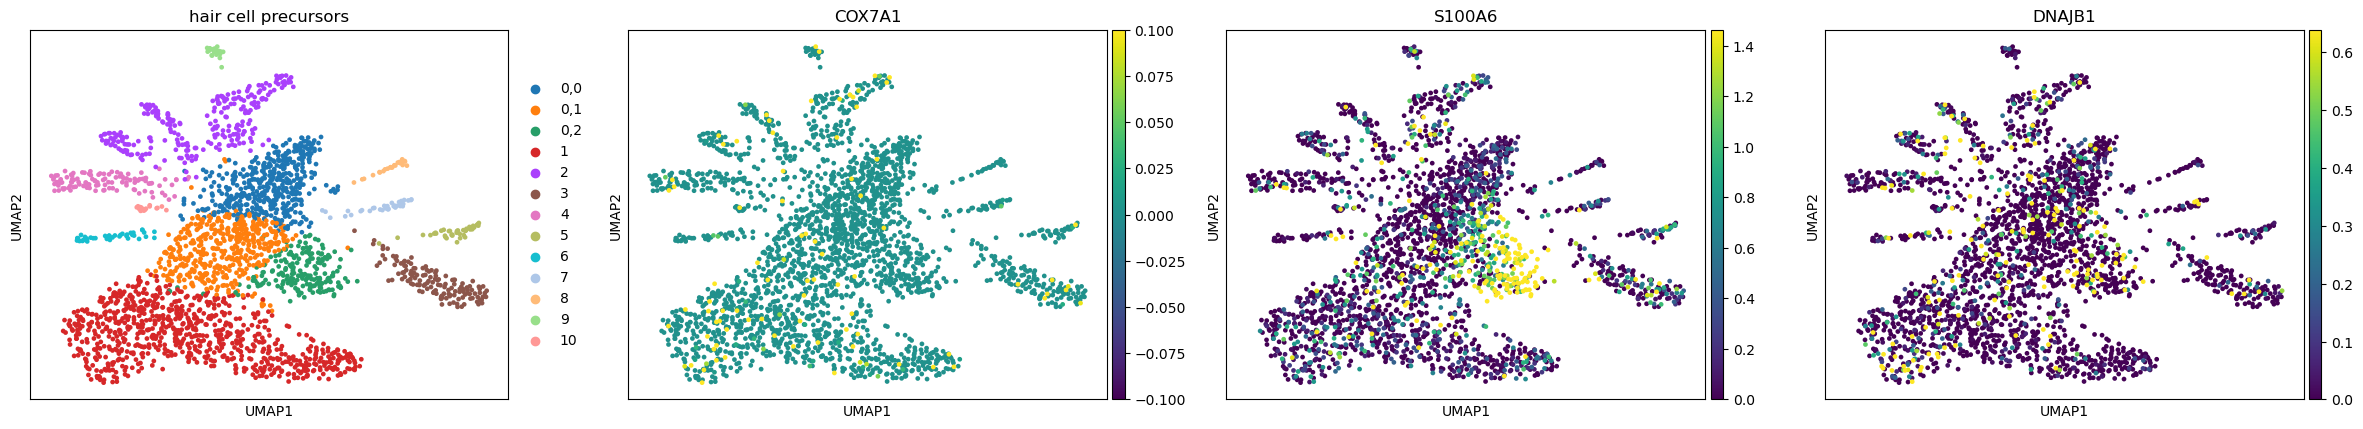

In [20]:
sc.pl.umap(human,color=['leiden_0','COX7A1', 'S100A6', 'DNAJB1'],layer='log1p',vmax='p95',title='hair cell precursors')


[Executed on 2023-12-12 10:05:09.820171]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


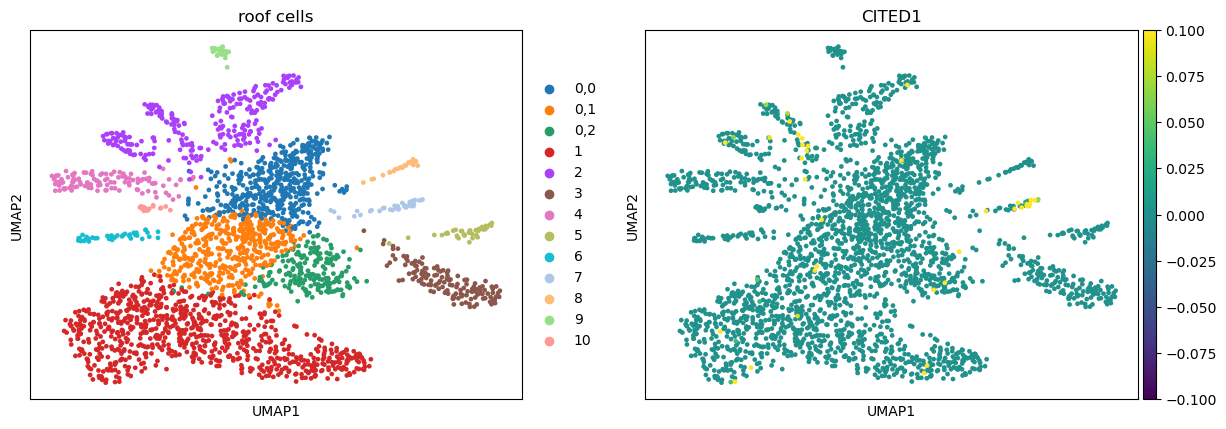

In [21]:

sc.pl.umap(human,color=['leiden_0','CITED1'],layer='log1p',vmax='p95',title='roof cells')

[Executed on 2023-12-12 10:05:29.039220]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


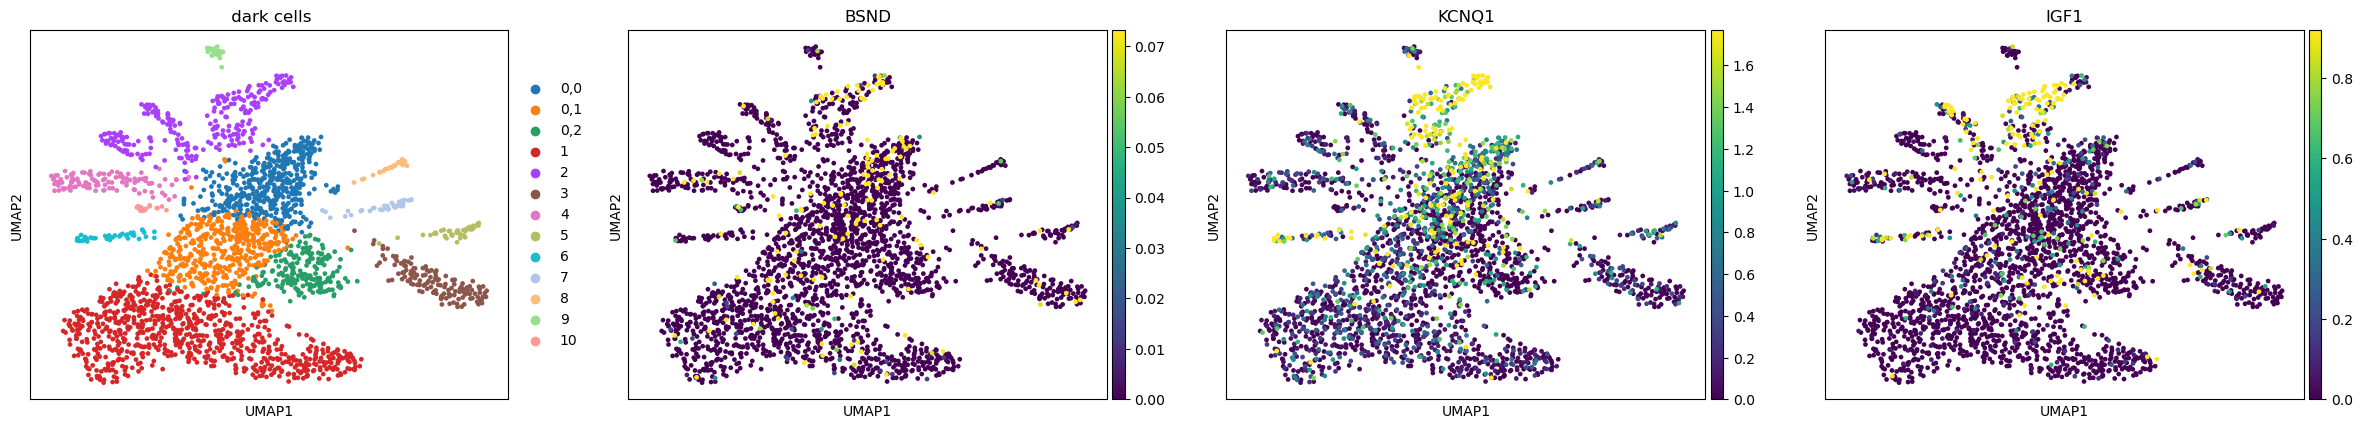

In [22]:
#BSND, KCNQ1, IGF1

sc.pl.umap(human,color=['leiden_0','BSND', 'KCNQ1', 'IGF1'],layer='log1p',vmax='p95',title=' dark cells')

[Executed on 2023-12-12 10:05:52.358285]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


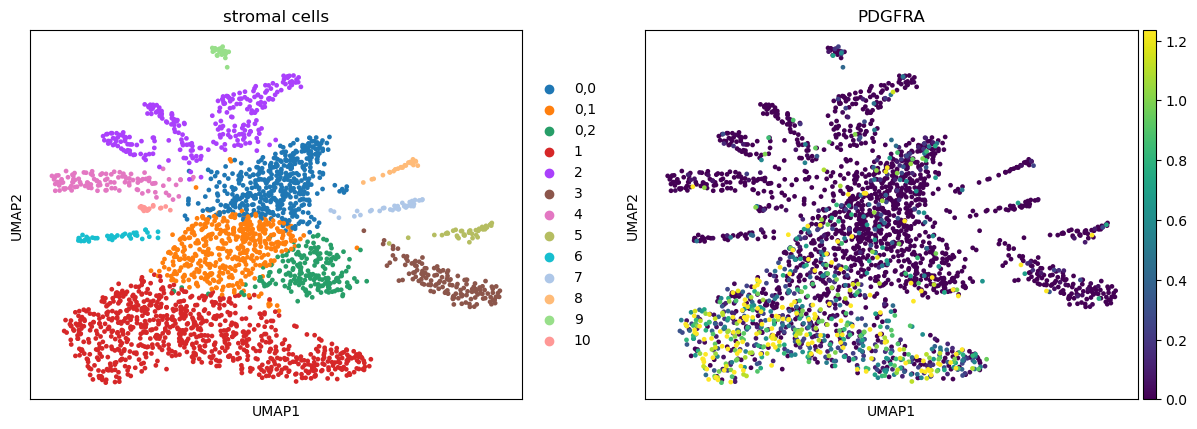

In [23]:
#PDGFRA

sc.pl.umap(human,color=['leiden_0','PDGFRA'],layer='log1p',vmax='p95',title='stromal cells')

[Executed on 2023-12-12 10:06:11.827483]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


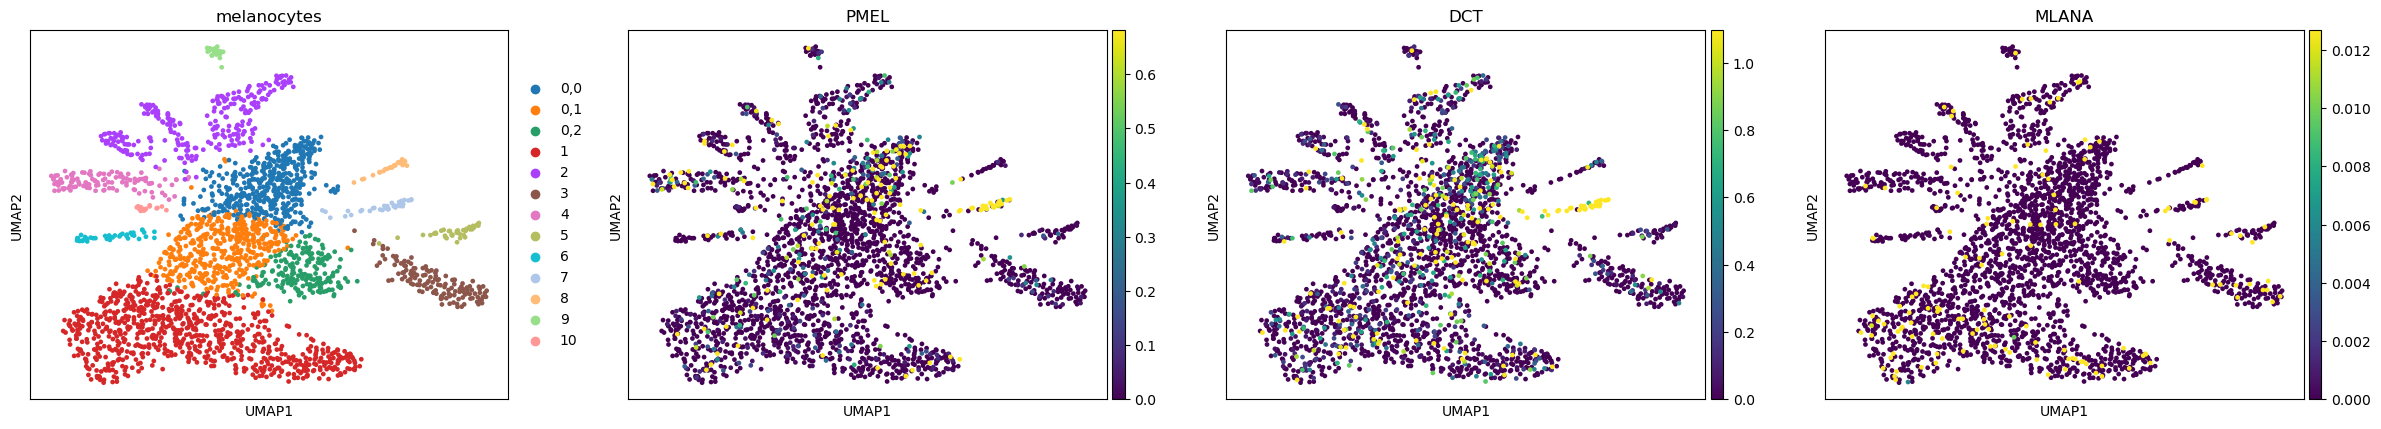

In [24]:
#PMEL, DCT, MLANA

sc.pl.umap(human,color=['leiden_0','PMEL', 'DCT', 'MLANA'],layer='log1p',vmax='p95',title='melanocytes')

[Executed on 2023-12-12 11:09:08.397536]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


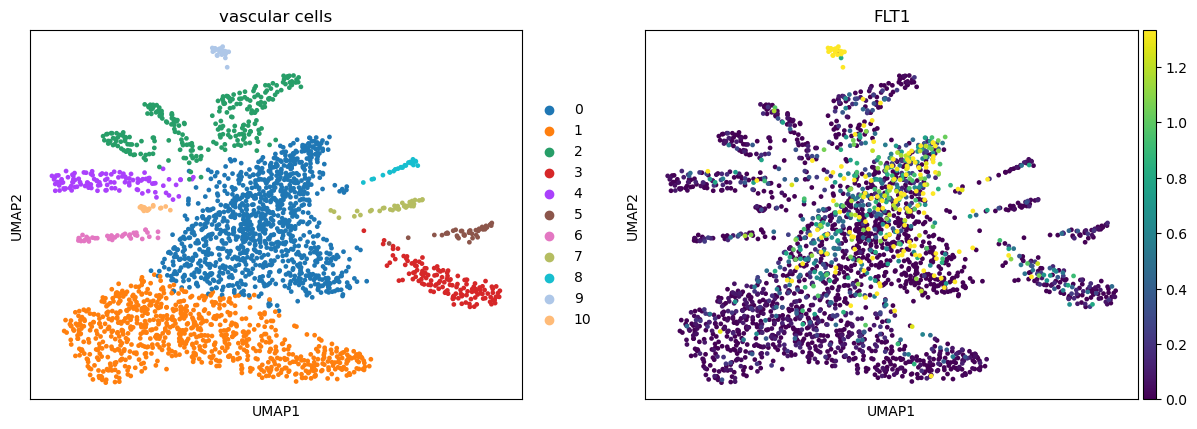

In [104]:
#Flt1

sc.pl.umap(human,color=['leiden','FLT1'],layer='log1p',vmax='p95',title='vascular cells')

In [102]:
human

[Executed on 2023-12-12 11:08:28.424492]


AnnData object with n_obs × n_vars = 2581 × 58035
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_0', 'leiden_0,0'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'leiden_0_colors', 'leiden_0,0_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log1p', 'read', 'scale', 'umi'
    obsp: 'connectivities', 'distances'

In [117]:
mouse

[Executed on 2023-12-12 11:15:13.971026]


AnnData object with n_obs × n_vars = 163 × 18257
    obs: 'CellID', 'TotalCounts', 'DetGenesAbove1CountFromTotalCounts', 'HHAnn', 'Batch', '_scvi_batch', '_scvi_labels', 'leiden', 'MetaType', 'leiden_subcluster', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Batch_colors', 'HHAnn_colors', 'MetaType_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_leiden_subcluster', 'leiden', 'leiden_colors', 'leiden_subcluster_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [116]:
sc.pp.calculate_qc_metrics(mouse, percent_top=None, log1p=False, inplace=True)

[Executed on 2023-12-12 11:15:06.939849]


In [105]:
human=human[~human.obs['leiden'].isin(['0','1'])].copy()
human

[Executed on 2023-12-12 11:09:45.964703]


AnnData object with n_obs × n_vars = 688 × 58035
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_0', 'leiden_0,0'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log1p', 'read', 'scale', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-12-12 11:09:53.661810]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


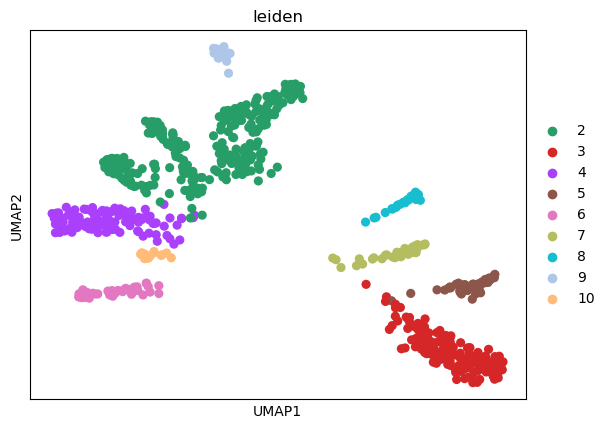

In [106]:
sc.pl.umap(human,color=['leiden'])

In [107]:
human.obs['scvi_cell_type']='unknown'

[Executed on 2023-12-12 11:10:51.559431]


In [109]:
human.layers['counts']=human.layers['read'].copy()

[Executed on 2023-12-12 11:11:44.236867]


[Executed on 2023-12-12 10:07:22.885834]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


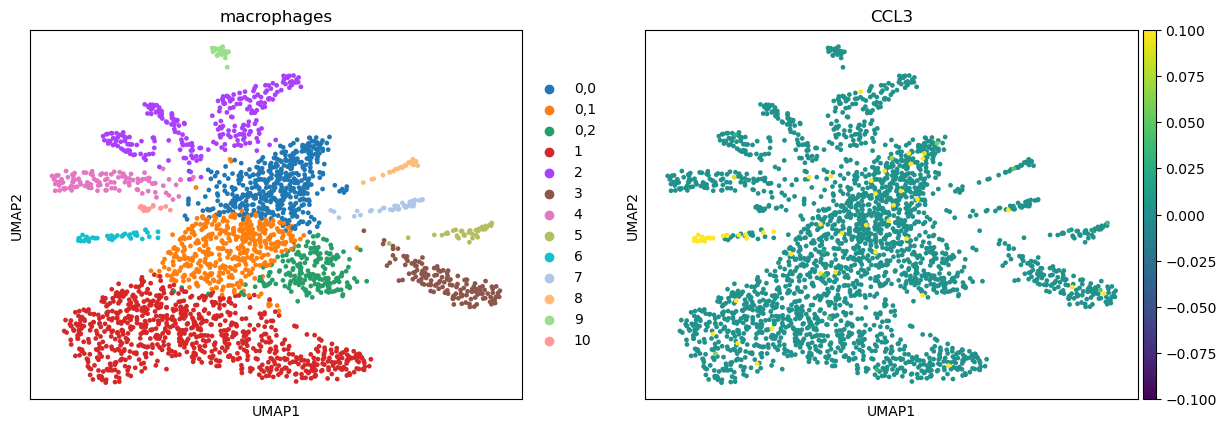

In [26]:
#CCL3

sc.pl.umap(human,color=['leiden_0','CCL3'],layer='log1p',vmax='p95',title='macrophages')

[Executed on 2023-12-12 10:08:01.927663]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


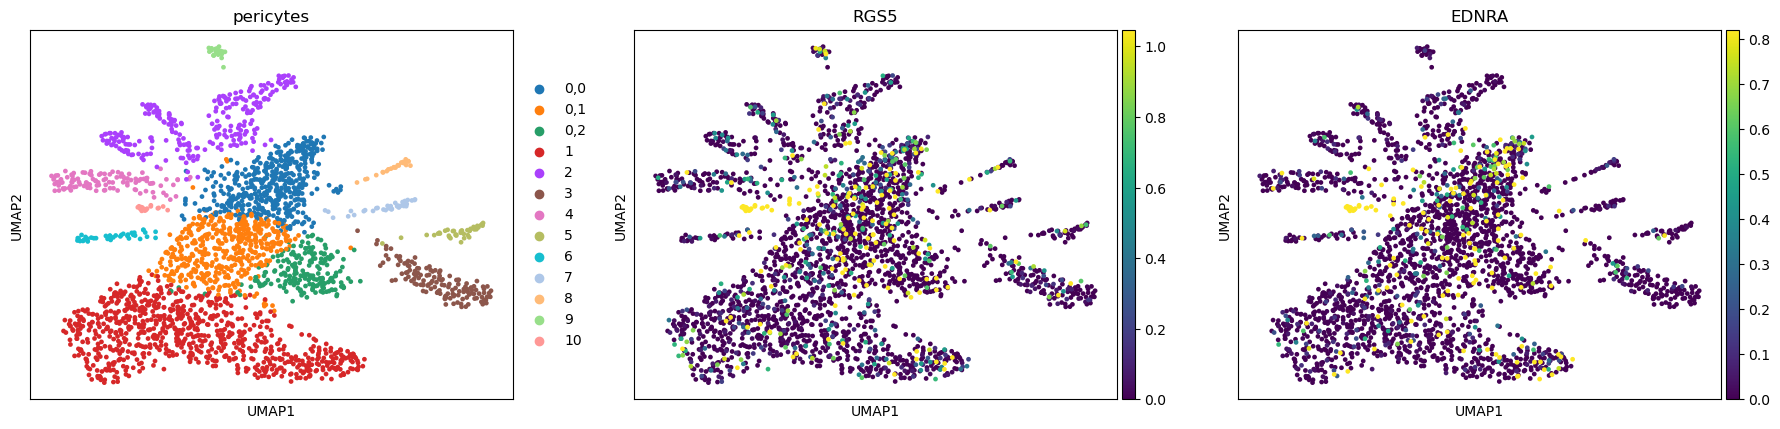

In [27]:
#RGS5, EDNRA

sc.pl.umap(human,color=['leiden_0','RGS5', 'EDNRA'],layer='log1p',vmax='p95',title='pericytes')

[Executed on 2023-12-12 10:08:30.045109]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


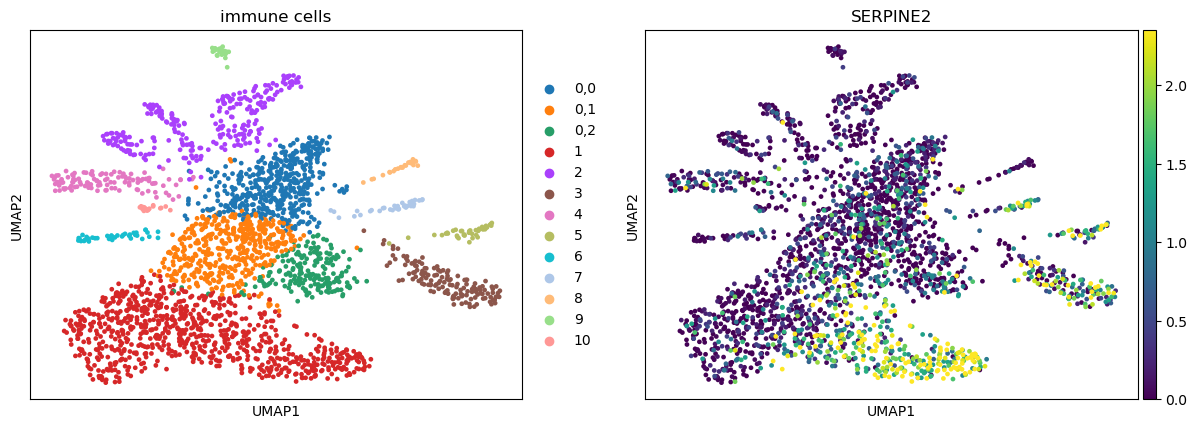

In [28]:
#SERPINE2

sc.pl.umap(human,color=['leiden_0','SERPINE2'],layer='log1p',vmax='p95',title='immune cells')

In [46]:
import pandas as pd
df1=pd.read_csv("/proj/sensoryaging/60_plates_data/Human_data/ref/mart_prep.csv")
df1

[Executed on 2023-12-12 10:22:45.197240]


Gene name Human gene name
0      0610010K14Rik        C17orf49
1      0610030E20Rik         C2orf68
2      0610040J01Rik         C4orf19
3      1110004F10Rik        C11orf58
4      1110017D15Rik         C9orf24
...              ...             ...
13899         mt-Nd4          MT-ND4
13900        mt-Nd4l         MT-ND4L
13901         mt-Nd5          MT-ND5
13902         mt-Nd6          MT-ND6
13903       n-R5s104         RNA5S10

[13904 rows x 2 columns]

In [47]:
#rename column 1 as gene
df1.rename(columns={'Gene name':'Mouse gene name'},inplace=True)

[Executed on 2023-12-12 10:23:29.332240]


In [48]:
df1

[Executed on 2023-12-12 10:23:31.896676]


Mouse gene name Human gene name
0       0610010K14Rik        C17orf49
1       0610030E20Rik         C2orf68
2       0610040J01Rik         C4orf19
3       1110004F10Rik        C11orf58
4       1110017D15Rik         C9orf24
...               ...             ...
13899          mt-Nd4          MT-ND4
13900         mt-Nd4l         MT-ND4L
13901          mt-Nd5          MT-ND5
13902          mt-Nd6          MT-ND6
13903        n-R5s104         RNA5S10

[13904 rows x 2 columns]

In [51]:
adata_used=adata.copy()

[Executed on 2023-12-12 10:24:13.124773]


In [55]:
formatted_var_names = adata_used.var_names.map(lambda x: x[0] + x[1:].lower())

# Update the var_names in adata_used with the formatted names
adata_used.var_names = formatted_var_names

adata_used.var_names

[Executed on 2023-12-12 10:28:30.599732]


Index(['Adora1', 'Sntg1', 'Prim2', 'Bai3', 'Cflar', 'Obsl1', 'Syt14', 'Pld5',
       'Lmx1a', 'Lactb2',
       ...
       'Tcf15', 'Ifitm1', 'Gm6607', 'E230019m04rik', 'Ndufa4l2', 'Tgtp1',
       'Ltc4s', 'A4galt', 'Tbx1', 'Tmem252'],
      dtype='object', length=18257)

In [57]:
import pandas as pd

# Assuming df1 and adata_used are already defined
# Extract the list of mouse gene names from df1
mouse_genes = set(df1['Mouse gene name'])

# Filter the AnnData object to only include columns (genes) present in mouse_genes
adata_used_filtered = adata_used[:, adata_used.var_names.isin(mouse_genes)]

# adata_used_filtered now contains only the genes present in df1's Mouse gene name column
adata_used_filtered

[Executed on 2023-12-12 10:31:28.303791]


View of AnnData object with n_obs × n_vars = 163 × 12151
    obs: 'CellID', 'TotalCounts', 'DetGenesAbove1CountFromTotalCounts', 'HHAnn', 'Batch', '_scvi_batch', '_scvi_labels', 'leiden', 'MetaType', 'leiden_subcluster'
    uns: 'Batch_colors', 'HHAnn_colors', 'MetaType_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_leiden_subcluster', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [58]:
human.var_names

[Executed on 2023-12-12 10:31:49.509716]


Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'DPH3P2-1', 'VAMP7-1', 'ELOCP24-1', 'TRPC6P1-1', 'ENSG00000292369',
       'WASIR1-1', 'DDX11L16-3', 'WASH6P-1', 'IL9R-1', 'GFP'],
      dtype='object', length=58035)

In [120]:
import pandas as pd

common_genes_df = df1[(df1['Mouse gene name'].isin(adata_used.var_names)) & (df1['Human gene name'].isin(human.var_names))]

# Filter adata_used based on the common mouse genes
mouse_filtered = mouse[:, mouse.var_names.isin(common_genes_df['Mouse gene name'])]

# Map the filtered mouse genes to human genes
mouse_filtered.var_names = common_genes_df.set_index('Mouse gene name').loc[mouse_filtered.var_names]['Human gene name']

# Filter the human AnnData object to only include genes present in adata_used_filtered.var_names
human_filtered = human[:, human.var_names.isin(mouse_filtered.var_names)]

# Ensure the order of genes is the same in both datasets
mouse_filtered = mouse_filtered[:, human_filtered.var_names].copy()
human_filtered = human_filtered[:, mouse_filtered.var_names].copy()

# Now adata_used_filtered and human_filtered have matching gene names in the same order


[Executed on 2023-12-12 11:16:45.478670]


In [126]:
mouse_filtered

[Executed on 2023-12-12 11:18:42.223547]


AnnData object with n_obs × n_vars = 163 × 12091
    obs: 'CellID', 'TotalCounts', 'DetGenesAbove1CountFromTotalCounts', 'HHAnn', 'Batch', '_scvi_batch', '_scvi_labels', 'leiden', 'MetaType', 'leiden_subcluster', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Batch_colors', 'HHAnn_colors', 'MetaType_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_leiden_subcluster', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

[Executed on 2023-12-12 11:18:58.214736]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


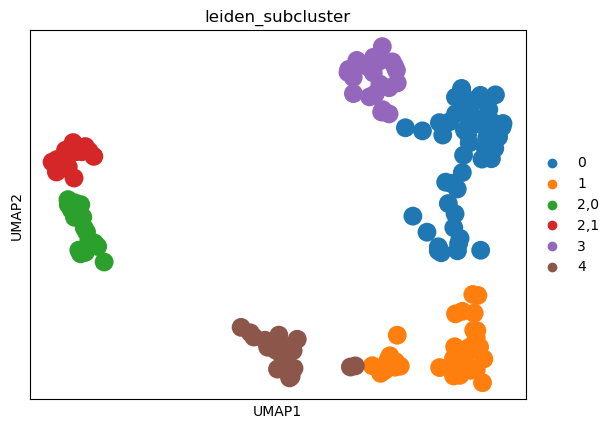

In [128]:
sc.pl.umap(mouse_filtered, color='leiden_subcluster')

In [138]:
#name cluster 2 as type 2 hair cells
mouse_filtered.obs['scvi_cell_type']=mouse_filtered.obs['leiden_subcluster'].replace('2,1','type2 hair cells_1')
mouse_filtered.obs['scvi_cell_type']=mouse_filtered.obs['scvi_cell_type'].replace('2,0','type2 hair cells_2')
mouse_filtered.obs['scvi_cell_type']=mouse_filtered.obs['scvi_cell_type'].replace('0','type1 hair cells_2')
mouse_filtered.obs['scvi_cell_type']=mouse_filtered.obs['scvi_cell_type'].replace('3','type1 hair cells_3')
mouse_filtered.obs['scvi_cell_type']=mouse_filtered.obs['scvi_cell_type'].replace('4','type1 hair cells_4')
mouse_filtered.obs['scvi_cell_type']=mouse_filtered.obs['scvi_cell_type'].replace('1','type1 hair cells_1')

[Executed on 2023-12-12 11:29:34.561291]


In [122]:
human_filtered

[Executed on 2023-12-12 11:16:56.360791]


AnnData object with n_obs × n_vars = 688 × 12091
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_0', 'leiden_0,0', 'scvi_cell_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log1p', 'read', 'scale', 'umi', 'counts'
    obsp: 'connectivities', 'distances'

In [133]:
human_filtered.obs['Species']='Human'
mouse_filtered.obs['Species']='Mouse'

[Executed on 2023-12-12 11:24:06.817730]


In [153]:
modified=sc.concat([mouse_filtered,human_filtered])

[Executed on 2023-12-12 13:27:16.671411]


In [154]:
sc.pp.filter_genes(modified,min_cells=3)
modified

[Executed on 2023-12-12 13:27:19.983610]


AnnData object with n_obs × n_vars = 851 × 12065
    obs: 'leiden', 'n_genes_by_counts', 'total_counts', 'scvi_cell_type', 'Species'
    var: 'n_cells'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [158]:
modified.X

[Executed on 2023-12-12 13:28:15.673139]


array([[0.66562998, 0.        , 0.        , ..., 0.        , 0.        ,
        2.03077786],
       [0.        , 0.        , 0.        , ..., 0.        , 3.16267884,
        1.86715145],
       [0.27279583, 0.94318972, 0.        , ..., 0.        , 0.        ,
        1.94003698],
       ...,
       [0.        , 1.73174437, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.14410269, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47460914, 1.03750164, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [156]:
modified.X=modified.layers['counts'].copy()
sc.pp.normalize_total(modified, target_sum=1e4)
sc.pp.log1p(modified)
modified.layers["log1p"] = modified.X.copy()
sc.pp.highly_variable_genes(modified, n_top_genes=3000, flavor='seurat_v3',layer='counts',subset=True, batch_key='Species')


[Executed on 2023-12-12 13:28:00.138321]


In [159]:
modified.write_h5ad('/proj/sensoryaging/60_plates_data/Human_data/Ml/merged_data.h5ad')

[Executed on 2023-12-12 13:28:24.507426]


In [143]:
modified

[Executed on 2023-12-12 11:32:09.710180]


AnnData object with n_obs × n_vars = 851 × 12091
    obs: 'leiden', 'n_genes_by_counts', 'total_counts', 'scvi_cell_type', 'Species'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [142]:
modified.obs['scvi_cell_type'].value_counts()

[Executed on 2023-12-12 11:29:51.127299]


scvi_cell_type
unknown               688
type1 hair cells_2     50
type1 hair cells_1     35
type1 hair cells_3     23
type1 hair cells_4     22
type2 hair cells_2     18
type2 hair cells_1     15
Name: count, dtype: int64

In [67]:
human_filtered.var_names

[Executed on 2023-12-12 10:37:11.464774]


Index(['TNMD', 'DPM1', 'SCYL3', 'FGR', 'FUCA2', 'GCLC', 'NFYA', 'STPG1',
       'NIPAL3', 'LAS1L',
       ...
       'MRPL45', 'PCDH20', 'SNORD98', 'MIR761', 'TBCE', 'TOMT', 'CCDC39',
       'NPBWR1', 'PRRC2B', 'SOD2'],
      dtype='object', length=12091)

In [78]:
human_filtered.write_h5ad('/proj/sensoryaging/60_plates_data/Human_data/Ml/human_used_filtered.h5ad')
adata_used_filtered.write_h5ad('/proj/sensoryaging/60_plates_data/Human_data/Ml/mouse_used_filtered.h5ad')

[Executed on 2023-12-12 10:42:20.783953]


In [72]:
human_filtered

[Executed on 2023-12-12 10:39:51.320779]


AnnData object with n_obs × n_vars = 2581 × 12091
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_0', 'leiden_0,0'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'leiden_0_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log1p', 'read', 'scale', 'umi'
    obsp: 'connectivities', 'distances'

In [73]:
human_filtered.obs['leiden']=human_filtered.obs['leiden_0'].copy()

[Executed on 2023-12-12 10:40:36.243828]


[Executed on 2023-12-12 10:51:54.047600]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


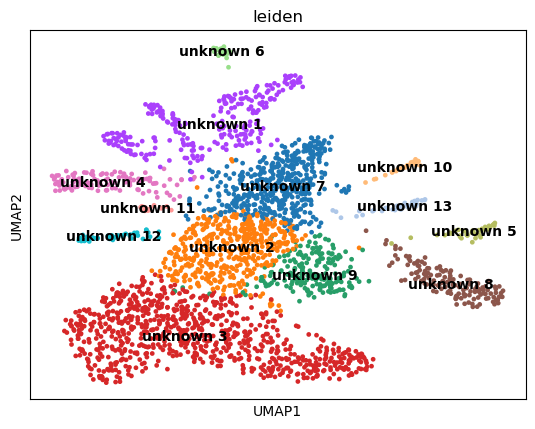

In [86]:
sc.pl.umap(human_filtered,color=['leiden'],legend_loc='on data')

In [87]:
human_filtered.obs['scvi_cell_type']='unknown'
adata_used_filtered.obs['scvi_cell_type']=adata_used_filtered.obs['leiden'].copy()

[Executed on 2023-12-12 10:53:33.843368]


In [75]:
human_filtered.obs['leiden'].value_counts()

[Executed on 2023-12-12 10:40:54.118138]


leiden
1      814
0,0    457
0,1    428
2      259
0,2    194
3      139
4      111
5       42
6       38
7       37
8       23
9       21
10      18
Name: count, dtype: int64

In [76]:
# First, get the unique values from the 'leiden' column
unique_leiden_values = human_filtered.obs['leiden'].unique()

# Create a mapping from each unique value to "unknown 1", "unknown 2", etc.
leiden_mapping = {val: f"unknown {i+1}" for i, val in enumerate(unique_leiden_values)}

# Apply this mapping to the 'leiden' column
human_filtered.obs['leiden'] = human_filtered.obs['leiden'].map(leiden_mapping)

# Now, if you check the value counts, they should be in the new format
print(human_filtered.obs['leiden'].value_counts())


[Executed on 2023-12-12 10:41:44.039445]
leiden
unknown 3     814
unknown 7     457
unknown 2     428
unknown 1     259
unknown 9     194
unknown 8     139
unknown 4     111
unknown 5      42
unknown 12     38
unknown 13     37
unknown 10     23
unknown 6      21
unknown 11     18
Name: count, dtype: int64


In [144]:
sc.pp.highly_variable_genes(modified, n_top_genes=3000, flavor='seurat_v3',layer='counts',subset=True, batch_key='Species')

[Executed on 2023-12-12 12:24:22.886011]


In [88]:
human_filtered.write_h5ad('/proj/sensoryaging/60_plates_data/Human_data/Ml/human_used_filtered.h5ad')
adata_used_filtered.write_h5ad('/proj/sensoryaging/60_plates_data/Human_data/Ml/mouse_used_filtered.h5ad')

[Executed on 2023-12-12 10:53:40.482210]


In [145]:

import numpy as np
import pandas as pd
import scanpy as sc
import scvi


[Executed on 2023-12-12 12:27:08.499323]


ImportError: cannot import name 'get_num_classes' from 'torchmetrics.utilities.data' (/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/torchmetrics/utilities/data.py)

In [94]:
human

[Executed on 2023-12-12 10:54:50.201144]


AnnData object with n_obs × n_vars = 2581 × 58035
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_0', 'leiden_0,0'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'leiden_0_colors', 'leiden_0,0_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log1p', 'read', 'scale', 'umi'
    obsp: 'connectivities', 'distances'

In [96]:
adata_used_filtered

[Executed on 2023-12-12 10:55:08.034472]


AnnData object with n_obs × n_vars = 163 × 12091
    obs: 'CellID', 'TotalCounts', 'DetGenesAbove1CountFromTotalCounts', 'HHAnn', 'Batch', '_scvi_batch', '_scvi_labels', 'leiden', 'MetaType', 'leiden_subcluster', 'Species', 'scvi_cell_type'
    uns: 'Batch_colors', 'HHAnn_colors', 'MetaType_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_leiden_subcluster', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

[Executed on 2023-12-12 10:44:21.012217]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_utils.py:431: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


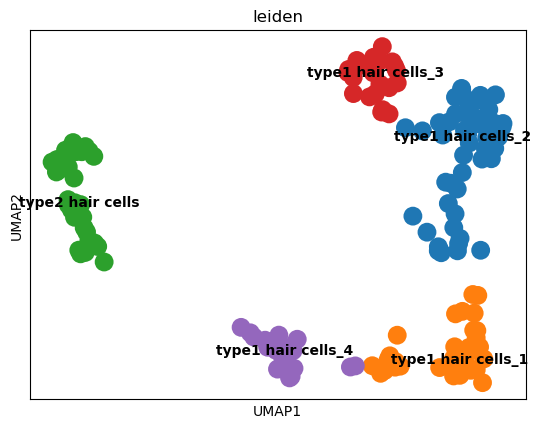

In [79]:
sc.pl.umap(adata_used_filtered,color=['leiden'],legend_loc='on data')

In [81]:
adata_used_filtered.obs['leiden']

[Executed on 2023-12-12 10:44:37.891612]


p442_A17    type1 hair cells_1
p442_A19    type1 hair cells_2
p442_A21    type1 hair cells_1
p442_A6     type1 hair cells_2
p442_A14      type2 hair cells
                   ...        
p328_J17    type1 hair cells_1
p328_J19      type2 hair cells
p328_J7     type1 hair cells_3
p328_K3     type1 hair cells_4
p328_K6     type1 hair cells_2
Name: leiden, Length: 163, dtype: category
Categories (5, object): ['type1 hair cells_2', 'type1 hair cells_1', 'type2 hair cells', 'type1 hair cells_3', 'type1 hair cells_4']

In [82]:
human_filtered.obs['leiden']

[Executed on 2023-12-12 10:44:49.407081]


AACATCGAGGAACTAGCGAT    unknown 1
AACATCGAGGAATCAGCGTA    unknown 2
AACATCGAGGACAGCCAGAT    unknown 2
AACATCGAGGACTGTCGACG    unknown 3
AACATCGAGGATCGCTAGAA    unknown 3
                          ...    
TTGTTACTCGTCTAGAAGAG    unknown 8
TTGTTACTCGTGCTGATGCG    unknown 3
TTGTTACTCGTGTATCTCCT    unknown 3
TTGTTACTCGTTCGAGTTGT    unknown 3
TTGTTACTCGTTCTAAGCCA    unknown 2
Name: leiden, Length: 2581, dtype: category
Categories (13, object): ['unknown 7', 'unknown 2', 'unknown 9', 'unknown 3', ..., 'unknown 13', 'unknown 10', 'unknown 6', 'unknown 11']

In [89]:
human_filtered.obs['Species'] = 'Human'
adata_used_filtered.obs['Species'] = 'Mouse'

merged_data = sc.concat([human_filtered, adata_used_filtered], label='Species')


[Executed on 2023-12-12 10:53:52.508205]


In [92]:
merged_data.X

[Executed on 2023-12-12 10:54:21.747834]


array([[-0.1431541 , -0.4818784 ,  0.95477873, ..., -0.04469015,
        -0.0700877 , -0.25881246],
       [-0.1431541 , -0.4818784 ,  2.1833048 , ..., -0.04469015,
         1.887838  ,  0.14340013],
       [-0.1431541 ,  0.77748   , -0.474966  , ..., -0.04469015,
        -0.9013449 ,  0.6621475 ],
       ...,
       [ 0.        ,  1.7166578 ,  0.6842065 , ...,  0.        ,
         0.02619967,  1.3316585 ],
       [ 0.        ,  0.8959292 ,  0.5333727 , ...,  0.        ,
         0.96729267,  0.8625004 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.56729   ,  0.        ]], dtype=float32)

In [91]:
merged_data.write_h5ad('/proj/sensoryaging/60_plates_data/Human_data/Ml/merged_data.h5ad')

[Executed on 2023-12-12 10:53:59.733649]


In [99]:
mouse=sc.read_h5ad("/proj/sensoryaging/60_plates_data/Human_data/ref/HC_adata_raw_full.h5ad")
mouse.X

[Executed on 2023-12-12 11:07:15.658695]


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.60778   ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.74595442,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [101]:
mouse.layers['counts']

[Executed on 2023-12-12 11:07:35.735691]


array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   7.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0., 235.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [160]:
hair_cell=sc.read_h5ad("/proj/sensoryaging/60_plates_data/Human_data/MLrealdata.h5ad")
hair_cell

[Executed on 2023-12-12 17:15:33.915704]


AnnData object with n_obs × n_vars = 851 × 3000
    obs: 'leiden', 'n_genes_by_counts', 'total_counts', 'scvi_cell_type', 'Species', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'C_scANVI_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_scANVI', 'X_umap', '_scvi_extra_continuous_covs'
    layers: 'counts', 'log1p'
    obsp: 'connectivities', 'distances'

[Executed on 2023-12-12 17:21:24.113530]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


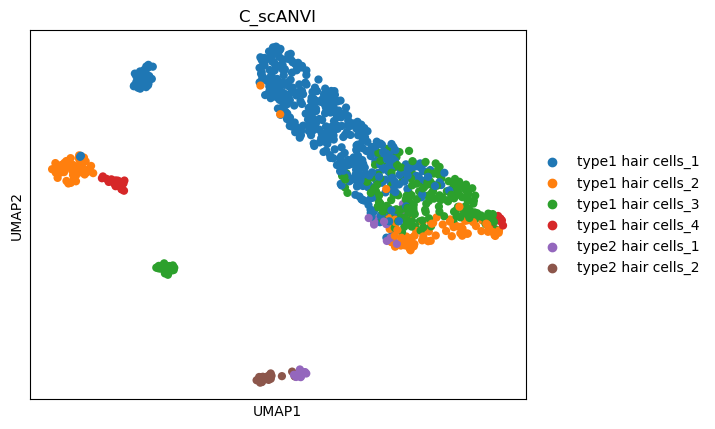

In [178]:
sc.pl.umap(hair_cell,color=['C_scANVI'])

In [179]:
hair_cell.obs['leiden'].value_counts()

[Executed on 2023-12-12 17:21:56.348170]


leiden
0    181
1    145
2    125
3    122
4    117
5     52
6     33
7     33
8     22
9     21
Name: count, dtype: int64

[Executed on 2023-12-12 17:26:21.995211]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(val

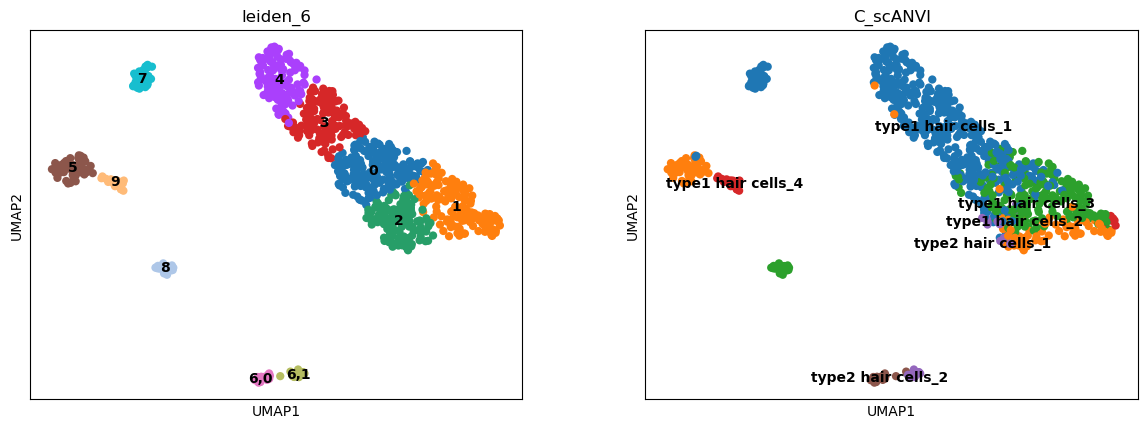

In [182]:
sc.pl.umap(hair_cell,color=['leiden_6','C_scANVI'],legend_loc='on data')

In [181]:
sc.tl.leiden(hair_cell,resolution=0.5, restrict_to=('leiden' , ['6']),key_added='leiden_6')

[Executed on 2023-12-12 17:26:17.708538]


[Executed on 2023-12-12 17:39:12.857497]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


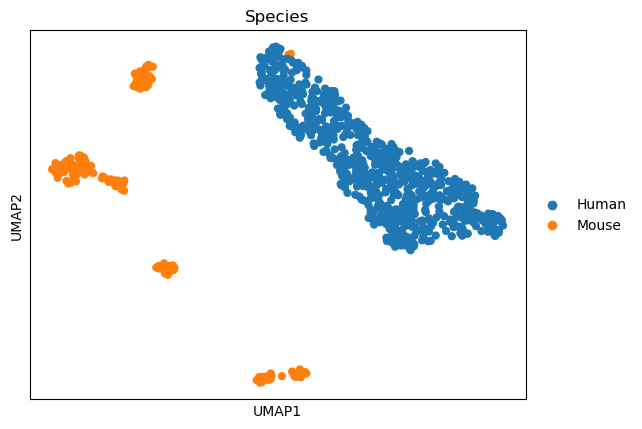

In [216]:
sc.pl.umap(hair_cell,color='Species')

In [217]:
# Assuming you have an AnnData object called `hair_cell` with a 'Species' column
# and you want to subset it to only include cells from the 'Human' species

# Create a boolean mask for cells with 'Species' equal to 'Human'
human_mask = (hair_cell.obs['Species'] == 'Human')

# Use the mask to subset the AnnData object
human_data = hair_cell[human_mask, :]

# Now `human_data` contains only cells from the 'Human' species
human_data

[Executed on 2023-12-12 17:43:16.454937]


View of AnnData object with n_obs × n_vars = 688 × 3000
    obs: 'leiden', 'n_genes_by_counts', 'total_counts', 'scvi_cell_type', 'Species', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'leiden_6'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'C_scANVI_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'log1p', 'neighbors', 'umap', 'leiden', 'leiden_6_colors', 'Species_colors'
    obsm: 'X_pca', 'X_scANVI', 'X_umap', '_scvi_extra_continuous_covs'
    layers: 'counts', 'log1p'
    obsp: 'connectivities', 'distances'

In [221]:
human_data.obs['_scvi_batch'].value_counts()

[Executed on 2023-12-12 17:44:23.271992]


_scvi_batch
0    688
Name: count, dtype: int64

[Executed on 2023-12-12 17:44:29.804580]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


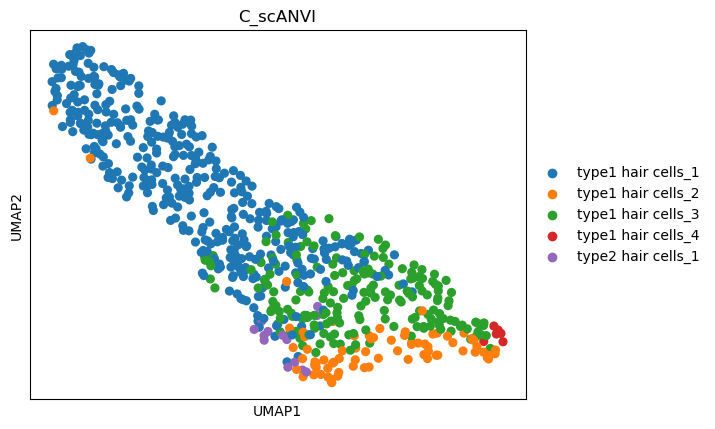

In [222]:
sc.pl.umap(human_data,color=['C_scANVI'])

In [224]:
human_data

[Executed on 2023-12-12 17:45:35.383635]


AnnData object with n_obs × n_vars = 688 × 3000
    obs: 'leiden', 'n_genes_by_counts', 'total_counts', 'scvi_cell_type', 'Species', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'leiden_6'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'C_scANVI_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'log1p', 'neighbors', 'umap', 'leiden', 'leiden_6_colors', 'Species_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_scANVI', 'X_umap', '_scvi_extra_continuous_covs'
    layers: 'counts', 'log1p'
    obsp: 'connectivities', 'distances'

In [227]:
human_data.X

[Executed on 2023-12-12 17:46:20.615698]


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13689637, 0.5069332 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.52381915, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.73174437, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.14410269, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47460914, 1.03750164, 0.        , ..., 0.        , 0.        ,
        0.        ]])

[Executed on 2023-12-12 17:45:54.107375]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(val

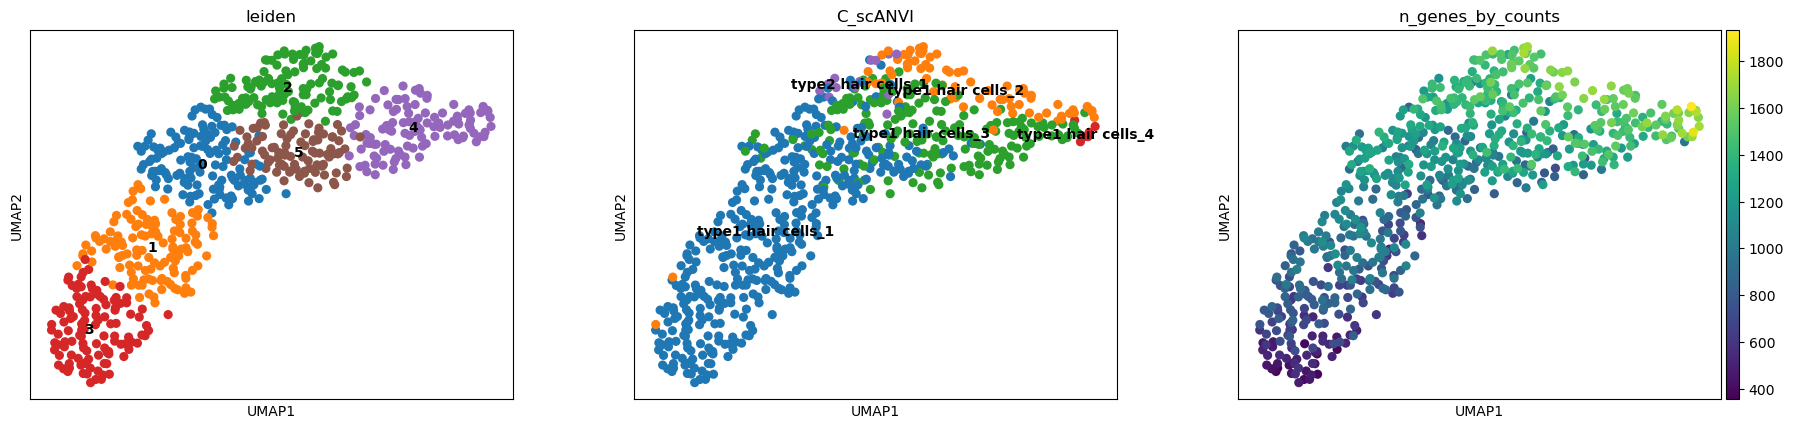

In [226]:
sc.tl.umap(human_data,min_dist=0.5,spread=0.77)

sc.tl.leiden(human_data,resolution=0.5)

sc.pl.umap(human_data,color=['leiden','C_scANVI','n_genes_by_counts'],legend_loc='on data')

In [184]:
hair_cell_filter=hair_cell[hair_cell.obs['leiden_6'].isin(['6,0','6,1','8','9','5','7'])].copy()

[Executed on 2023-12-12 17:28:00.805958]


[Executed on 2023-12-12 17:35:18.543625]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(val

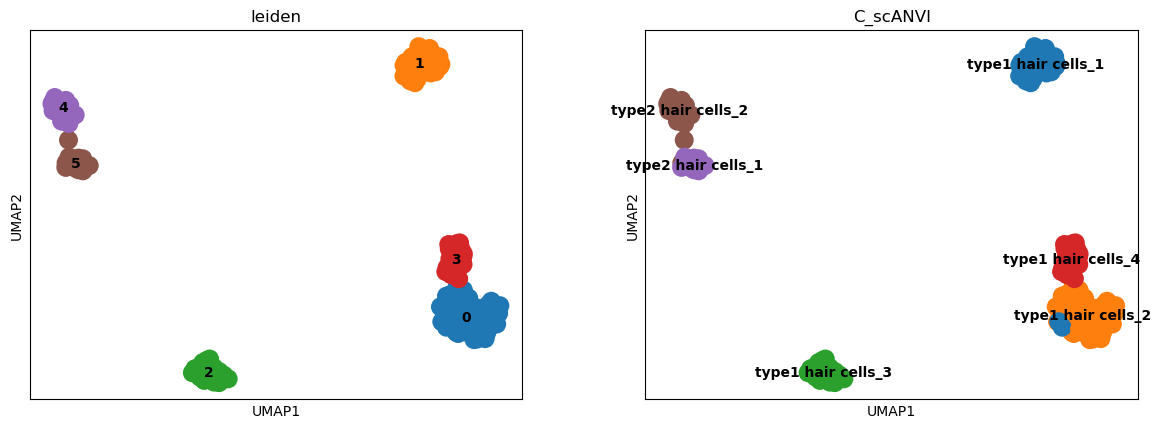

In [201]:
#sc.tl.umap(hair_cell_filter)
#sc.tl.leiden(hair_cell_filter,resolution=0.3)

sc.pl.umap(hair_cell_filter,color=['leiden','C_scANVI'],legend_loc='on data')

In [206]:
hair_cell_filter.obs['leiden'].astype(str)

[Executed on 2023-12-12 17:36:11.775380]


p442_A19    0
p442_A21    1
p442_A6     0
p442_A14    4
p442_B7     2
           ..
p328_J17    1
p328_J19    5
p328_J7     2
p328_K3     3
p328_K6     0
Name: leiden, Length: 161, dtype: object

In [207]:
hair_cell_filter.obs['leiden'].value_counts()

[Executed on 2023-12-12 17:36:20.493557]


leiden
0    52
1    33
2    22
3    21
4    18
5    15
Name: count, dtype: int64

In [204]:
hair_cell_filter.obs['C_scANVI'].value_counts()

[Executed on 2023-12-12 17:35:41.703207]


C_scANVI
type1 hair cells_2    50
type1 hair cells_1    35
type1 hair cells_3    22
type2 hair cells_2    21
type1 hair cells_4    21
type2 hair cells_1    12
Name: count, dtype: int64

In [212]:
hair_cell_filter.obs['Species'].value_counts()

[Executed on 2023-12-12 17:38:12.594098]


Species
Mouse    161
Name: count, dtype: int64

In [208]:
selected_cells = hair_cell_filter.obs.loc[(hair_cell_filter.obs['leiden'] == '0') & (hair_cell_filter.obs['C_scANVI'] == 'type1 hair cells_1')]
selected_cells

hair_cell_filter=hair_cell_filter[~hair_cell_filter.obs.index.isin(selected_cells.index)].copy()

[Executed on 2023-12-12 17:36:32.917478]


leiden  n_genes_by_counts  total_counts      scvi_cell_type Species  \
p328_E11      0                850    884.691270  type1 hair cells_2   Mouse   
p328_F11      0                500    644.817434  type1 hair cells_4   Mouse   

          _scvi_batch  _scvi_labels            C_scANVI leiden_6  
p328_E11            1             1  type1 hair cells_1        5  
p328_F11            1             3  type1 hair cells_1        5

In [164]:
adata

[Executed on 2023-12-12 17:17:07.024910]


AnnData object with n_obs × n_vars = 163 × 18257
    obs: 'CellID', 'TotalCounts', 'DetGenesAbove1CountFromTotalCounts', 'HHAnn', 'Batch', '_scvi_batch', '_scvi_labels', 'leiden', 'MetaType', 'leiden_subcluster'
    uns: 'Batch_colors', 'HHAnn_colors', 'MetaType_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_leiden_subcluster', 'leiden', 'leiden_colors', 'leiden_subcluster_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

[Executed on 2023-12-12 17:17:43.146352]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


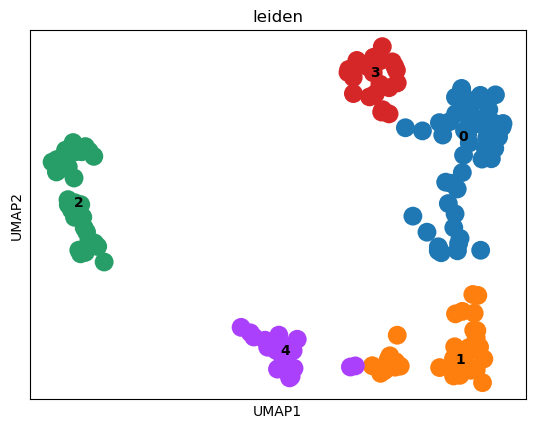

In [165]:
sc.pl.umap(adata,color=['leiden_'],legend_loc='on data')

In [167]:
import pandas as pd
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

[Executed on 2023-12-12 17:18:09.114453]


0        1     2,0    2,1              3        4
0     Synpr   Loxhd1  Osbpl6   Dlk2            Gsn     Fgf7
1    Rasal2   Kcnj16    Pcp4  Rasd2          Rspo3  S100a13
2     Calm1     Gbx2   Scn3b  Tjap1         Acot11   S100a1
3    Scpep1  Gm14461  Atp2b1  Psat1         Sema6d     Tbx1
4     Plcd3  Col27a1    Pole    Ptn         Ccdc33     Spp1
5  Cacna2d4     Cib2  Thsd7b  Chst5      Hist3h2ba      Clu
6    Atp8a1    Cd24a   Pxdc1  Mgst3         Anks1b      Lbh
7       Ckb    Tshz3    Otof  Mob3b           Cib3     Whrn
8      Dnm1      Gls  Osbpl9   Fmn1          Neat1   Erich5
9    Gm1322      Fry   Lce6a  Ush2a  E030019B06Rik   Trip12

[Executed on 2023-12-12 17:19:19.129209]


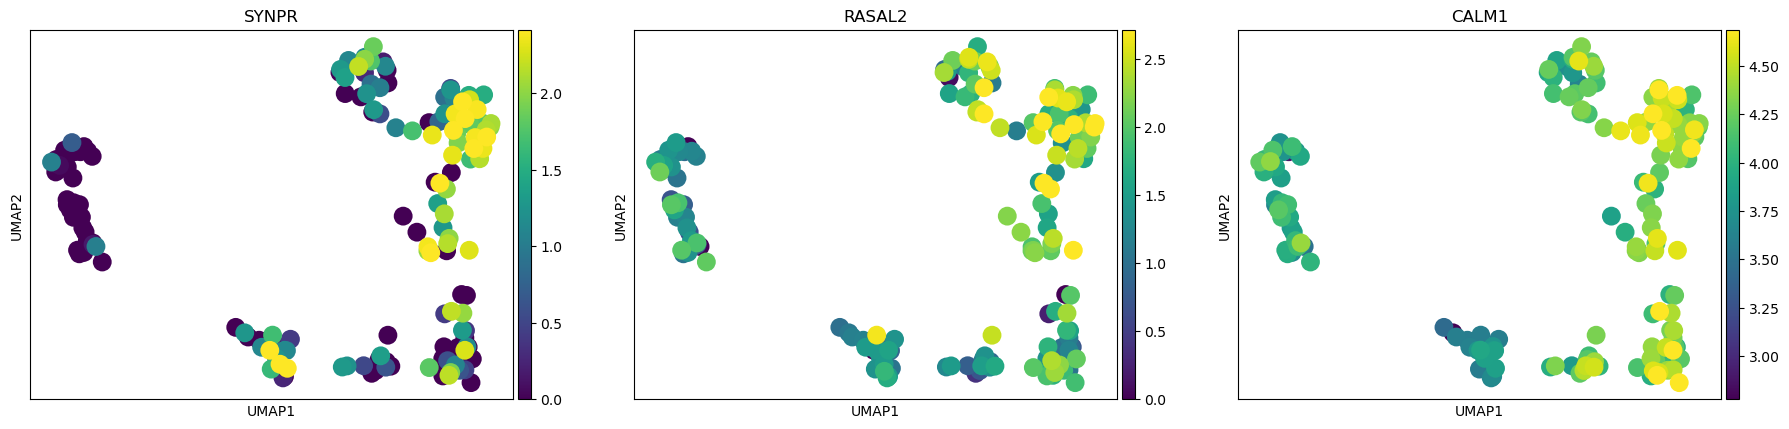

In [172]:
sc.pl.umap(adata,color=['SYNPR','RASAL2','CALM1'],vmax='p95')

In [228]:
human

[Executed on 2023-12-12 17:52:00.019778]


AnnData object with n_obs × n_vars = 688 × 58035
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_0', 'leiden_0,0', 'scvi_cell_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log1p', 'read', 'scale', 'umi', 'counts'
    obsp: 'connectivities', 'distances'